In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [7]:
print(len(X_train_full))
print(len(X_test))
print(len(X_train))
print(len(X_valid))

15480
5160
11610
3870


In [9]:
df_train = pd.DataFrame(X_train, columns=housing.feature_names)
df_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.5214,15.0,3.049945,1.106548,1447.0,1.605993,37.63,-122.43
1,5.3275,5.0,6.490060,0.991054,3464.0,3.443340,33.69,-117.39
2,3.1000,29.0,7.542373,1.591525,1328.0,2.250847,38.44,-122.98
3,7.1736,12.0,6.289003,0.997442,1054.0,2.695652,33.55,-117.70
4,2.0549,13.0,5.312457,1.085092,3297.0,2.244384,33.93,-116.93


In [10]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
len(X_train)

11610

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(10, activation="relu"), 
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

E:\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4972 - val_loss: 0.8200
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6744 - val_loss: 0.6783
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6222 - val_loss: 0.6142
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5844 - val_loss: 0.5725
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5535 - val_loss: 0.5422
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5278 - val_loss: 0.5201
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5067 - val_loss: 0.5028
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4892 - val_loss: 0.4899
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4748 - val_loss: 0.4803
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4629 - val_loss: 0.4740
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4533 - val_loss: 0.4700
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

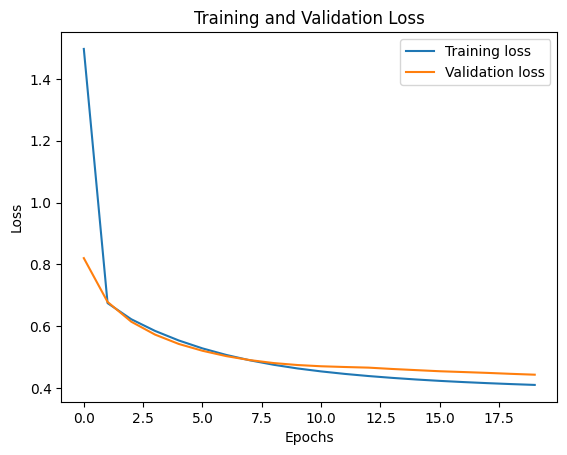

In [18]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3992  


In [20]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

for i in range(len(X_new)):
    print(f"Predicted: {y_pred[i][0]}, Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted: 0.7766526341438293, Actual: 0.477
Predicted: 1.5811858177185059, Actual: 0.458
Predicted: 3.4155983924865723, Actual: 5.00001
